In [382]:
import pandas as pd 
df = pd.read_parquet("04_results_texts_diffPrompt2.parquet")
df.columns

Index(['index', 'topic', 'questions', 'gen_questions', 'Imperative Form',
       'Question', 'Search String', 'Positive', 'Hard Negative', 'raw_texts'],
      dtype='object')

In [376]:
len(df)

82651

In [383]:
len(df[df["raw_texts"]!="nan"])

21120

In [384]:
for n, row in df[df["raw_texts"]!="nan"][-3:].iterrows():
    print(row[["Imperative Form", "Question", "Search String"]].values)
    print(row["raw_texts"])

['"Finde Nachrichtenartikel zur Sozialpolitik in Deutschland."'
 '"Wo kann ich Nachrichtenartikel zur Sozialpolitik in Deutschland finden?"'
 'Nachrichtenartikel Sozialpolitik Deutschland']
Hard negative example (not containing the answer to the questions!):

Die Sozialpolitik in Frankreich ist ein äußerst interessantes Thema, das viele Menschen beschäftigt. Im Vergleich zu Deutschland hat Frankreich ein anderes Sozialsystem, das sich durch eine stärkere Staatlichkeit und eine universelle Krankenversicherung auszeichnet. Die französische Sozialpolitik ist auch für ihre Arbeitsmarktreformen bekannt, die zu einer höheren Flexibilität und einem besseren Schutz der Arbeitnehmer führen sollen. Die Unterschiede zwischen den Sozialsystemen Deutschlands und Frankreichs sind daher sehr spannend zu vergleichen und zu analysieren.

Positive example (answering the questions directly):

Um Nachrichtenartikel zur Sozialpolitik in Deutschland zu finden, können Sie verschiedene Online-Nachrichtenporta

# Statistics of Dataset
## Characters

In [356]:
charlengths = df[df["raw_texts"]!="nan"]['raw_texts'].str.len()
mean_char_length = charlengths.mean()
characters = mean_char_length/2
print(f"Mean number of characters: {characters}")


Mean number of characters: 1019.4851862980769


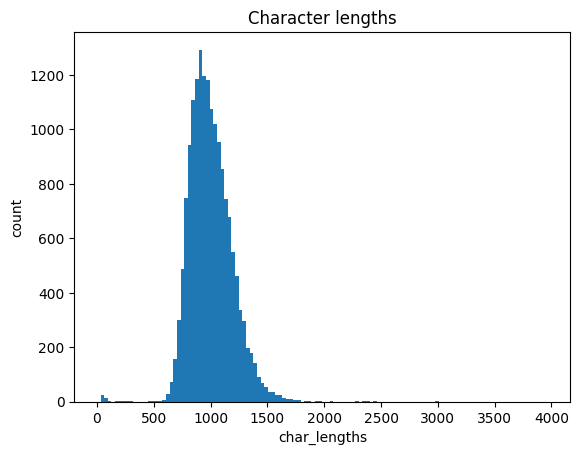

In [357]:
import matplotlib.pyplot as plt 
bins = range(0,4000,32)
hist = plt.hist(charlengths/2, bins=bins)
title = plt.title("Character lengths")
xlabel = plt.xlabel("char_lengths")
ylabel = plt.ylabel("count")

## Words

In [358]:
import numpy as np 
word_lengths = df[df["raw_texts"]!="nan"]['raw_texts'].str.split().apply(len)
mean_word_length = word_lengths.mean()
words = mean_word_length/2
print(f"Mean number of words: {words}")

Mean number of words: 137.14645432692308


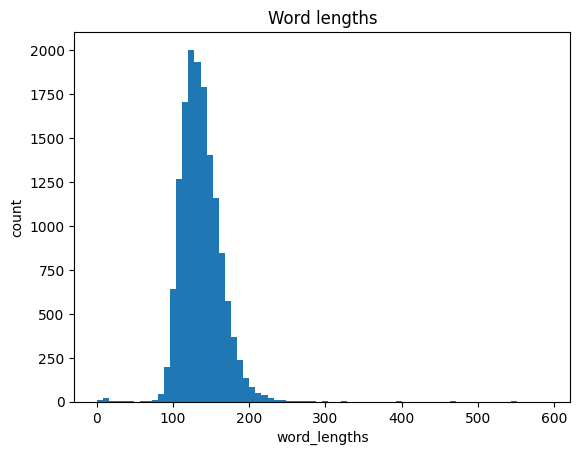

In [338]:
import matplotlib.pyplot as plt 
bins = range(0,600,8)
hist = plt.hist(word_lengths/2, bins=bins)
title = plt.title("Word lengths")
xlabel = plt.xlabel("word_lengths")
ylabel = plt.ylabel("count")

## Tokens

In [359]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('gpt2')

import numpy as np 
token_lengths = df[df["raw_texts"]!="nan"]['raw_texts'].apply(lambda text: len(tokenizer.encode(text, add_special_tokens=True)))-len(tokenizer.encode("Hard negative example (not containing the answer to the questions!):"))-len(tokenizer.encode("Positive example (answering the questions directly):"))
mean_token_length = token_lengths.mean()
tokens = mean_token_length/2
print(f"Mean number of words: {tokens}")




Token indices sequence length is longer than the specified maximum sequence length for this model (1190 > 1024). Running this sequence through the model will result in indexing errors


Mean number of words: 355.77641225961537


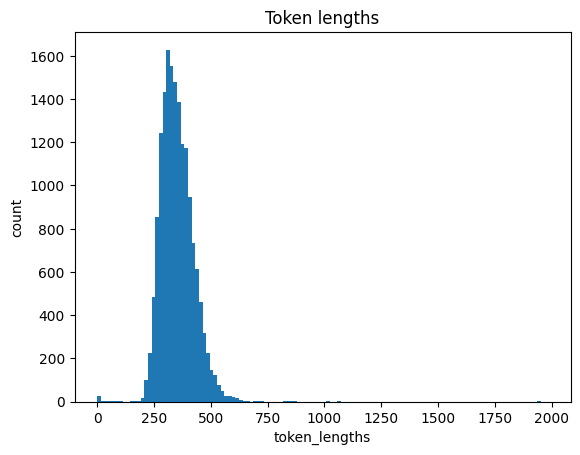

In [360]:
import matplotlib.pyplot as plt 
bins = range(0,2000,16)
hist = plt.hist(token_lengths/2, bins=bins)
title = plt.title("Token lengths")
xlabel = plt.xlabel("token_lengths")
ylabel = plt.ylabel("count")

# Output-Example

In [361]:
from pprint import pprint 
row = 33
print("---------[Questions]---------")
print("Imperative Form:")
print(df["Imperative Form"][row])
print("Search String:")
print(df["Search String"][row])
print("Question:")
print(df["Question"][row])
print("---------[Raw Text]---------")
print(df["raw_texts"][row])

---------[Questions]---------
Imperative Form:
"Erstelle eine Liste mit wichtigen Reisetipps und Sicherheitshinweisen für eine Reise nach Thailand."
Search String:
Reisetipps Thailand Sicherheit
Question:
"Was sind wichtige Reisetipps und Sicherheitshinweise für eine Reise nach Thailand?"
---------[Raw Text]---------
Hard negative example (not containing the answer to the questions!):

Reisen nach Asien sind für viele Menschen ein Traum, und Thailand ist ein beliebtes Ziel. Doch bevor Sie Ihre Koffer packen, sollten Sie sich über die lokalen Gepflogenheiten informieren, um kulturelle Missverständnisse zu vermeiden. In Thailand ist es beispielsweise unangebracht, die königliche Familie in irgendeiner Form zu beleidigen oder zu verspotten. Auch das Berühren des Kopfes eines Thailänders ist ein Tabu, da der Kopf in der thailändischen Kultur als das heiligste Körperteil gilt.

Es ist außerdem wichtig, sich über die lokale Währung, den Baht, zu informieren und sich mit dem Umtauschkurs vert

In [322]:
from pprint import pprint
import random 

row = random.randint(0,len(df[df["raw_texts"]!="nan"]))
print("---------[Questions]---------")
print("Imperative Form:")
print(df["Imperative Form"][row])
print("Search String:")
print(df["Search String"][row])
print("Question:")
print(df["Question"][row])
print("---------[Raw Text]---------")
print(df["raw_texts"][row])

---------[Questions]---------
Imperative Form:
"Erstelle eine Übersicht über die Integrationsmaßnahmen für ausländische Fachkräfte."
Search String:
Integrationsmaßnahmen ausländische Fachkräfte
Question:
"Welche Integrationsmaßnahmen gibt es für ausländische Fachkräfte?"
---------[Raw Text]---------
Hard negative example (not containing the answer to the questions!):

Die Agentur für Arbeit ist eine wichtige Institution in Deutschland, die sich um die Belange der Arbeitssuchenden und Arbeitgeber kümmert. Sie bietet verschiedene Dienstleistungen an, um Arbeitslose bei der Jobsuche zu unterstützen und Unternehmen bei der Personalrekrutierung zu helfen. Einen besonderen Fokus legt die Agentur für Arbeit auf die Integration von Menschen mit Migrationshintergrund in den Arbeitsmarkt. Hierzu werden verschiedene Projekte und Initiativen ins Leben gerufen, die die sprachlichen und fachlichen Kompetenzen der Zuwanderer fördern und sie auf den deutschen Arbeitsmarkt vorbereiten.

Positive exampl

In [323]:
from pprint import pprint
import random 

row = random.randint(0,len(df[df["raw_texts"]!="nan"]))
print("---------[Questions]---------")
print("Imperative Form:")
print(df["Imperative Form"][row])
print("Search String:")
print(df["Search String"][row])
print("Question:")
print(df["Question"][row])
print("---------[Raw Text]---------")
print(df["raw_texts"][row])

---------[Questions]---------
Imperative Form:
"Suchen Sie nach Ressourcen, um die Benutzerfreundlichkeit von Websites in Adobe Dreamweaver zu verbessern."
Search String:
Ressourcen Benutzerfreundlichkeit verbessern Adobe Dreamweaver
Question:
"Wo kann ich Ressourcen finden, um die Benutzerfreundlichkeit von Websites in Adobe Dreamweaver zu verbessern?"
---------[Raw Text]---------
Hard negative example (not containing the answer to the questions!):

Die Verbesserung der Benutzerfreundlichkeit von Websites ist ein wichtiger Aspekt der modernen Webentwicklung. Viele Webdesigner und Entwickler setzen auf Adobe Dreamweaver als ihr bevorzugtes Werkzeug für die Erstellung und Bearbeitung von Websites. Es ist jedoch wichtig zu beachten, dass Adobe Dreamweaver nicht nur ein Tool zur Erstellung von Websites ist, sondern auch eine Vielzahl von Funktionen und Möglichkeiten bietet, um die Benutzerfreundlichkeit von Websites zu verbessern.

Es gibt jedoch keinen einfachen Weg, um die Benutzerfreun

In [325]:
from pprint import pprint
import random 

row = random.randint(0,len(df[df["raw_texts"]!="nan"]))
print("---------[Questions]---------")
print("Imperative Form:")
print(df["Imperative Form"][row])
print("Search String:")
print(df["Search String"][row])
print("Question:")
print(df["Question"][row])
print("---------[Raw Text]---------")
print(df["raw_texts"][row])

---------[Questions]---------
Imperative Form:
"Finden Sie Informationen über die Integration von erneuerbaren Energien in das Stromnetz."
Search String:
Integration erneuerbarer Energien Stromnetz
Question:
"Wie wird die Integration erneuerbarer Energien in das Stromnetz durchgeführt?"
---------[Raw Text]---------
Hard negative example (not containing the answer to the questions!):

Erneuerbare Energien sind eine wichtige Säule der Energiepolitik und tragen zur Reduzierung von Treibhausgasemissionen bei. Doch wie sieht es mit der Nutzung von Solarenergie in Deutschland aus? Laut Bundesverband Solarwirtschaft e.V. wurden im Jahr 2020 rund 4,8 Gigawatt an Solarenergieleistung installiert. Dies entspricht einem Anstieg von 3 % im Vergleich zum Vorjahr. Doch wie wird die Solarenergie genutzt? In Deutschland wird Solarenergie hauptsächlich zur Stromerzeugung eingesetzt. Die erzeugte Energie wird ins Stromnetz eingespeist und kann so von Verbrauchern genutzt werden. Doch wie funktioniert da

In [326]:
from pprint import pprint
import random 

row = random.randint(0,len(df[df["raw_texts"]!="nan"]))
print("---------[Questions]---------")
print("Imperative Form:")
print(df["Imperative Form"][row])
print("Search String:")
print(df["Search String"][row])
print("Question:")
print(df["Question"][row])
print("---------[Raw Text]---------")
print(df["raw_texts"][row])

---------[Questions]---------
Imperative Form:
"Suchen Sie nach Artikeln, die die Geschichte der Astronomie beschreiben."
Search String:
Artikel Geschichte der Astronomie
Question:
"Wo kann ich Artikel finden, die die Geschichte der Astronomie beschreiben?"
---------[Raw Text]---------
Hard negative example (not containing the answer to the questions!):

Die Geschichte der Botanik ist ebenso faszinierend wie die Geschichte der Astronomie. Schon vor tausenden von Jahren versuchten Menschen, die Pflanzenwelt zu verstehen und zu kategorisieren. Die alten Griechen und Römer machten erste zaghafte Versuche, Pflanzen zu benennen und zu klassifizieren. Im Mittelalter entwickelten sich dann die Klostergärten, in denen Mönche heimische und exotische Pflanzen anbauten und studierten. Im 16. und 17. Jahrhundert erlebte die Botanik schließlich ihre Blütezeit, als Naturforscher wie Carl von Linné systematische Namen und Klassifikationen für Pflanzen einführten. Auch heute noch ist die Botanik ein a

In [352]:
from pprint import pprint
import random 

row = random.randint(0,len(df[df["raw_texts"]!="nan"]))
print(f"---------[Questions {row}]---------")
print("Imperative Form:")
print(df["Imperative Form"][row])
print("Search String:")
print(df["Search String"][row])
print("Question:")
print(df["Question"][row])
print("---------[Raw Text]---------")
print(df["raw_texts"][row])

---------[Questions 7964]---------
Imperative Form:
"Ermittle Benutzerkonten mit spezifischen Rechten."
Search String:
Benutzerkonten mit bestimmten Rechten finden
Question:
"Welche Benutzerkonten besitzen bestimmte Rechte?"
---------[Raw Text]---------
Hard negative example (not containing the answer to the questions!):

Benutzerkonten sind heutzutage ein wichtiger Bestandteil vieler Online-Dienste und -Plattformen. Ob bei sozialen Medien, E-Commerce-Websites oder Unternehmenssoftware – Benutzerkonten ermöglichen es, individuelle Einstellungen vorzunehmen und persönliche Daten zu speichern. Doch was passiert, wenn man vergisst, sich abzumelden? In vielen Fällen bleibt das Konto aktiv und andere Nutzer können potenziell auf die persönlichen Daten zugreifen. Um dies zu verhindern, sollten Nutzer sich immer abmelden, wenn sie einen Online-Dienst verlassen. Zusätzlich können Zwei-Faktor-Authentifizierung und starke Passwörter dazu beitragen, die Sicherheit von Benutzerkonten zu erhöhen.



In [328]:
from pprint import pprint
import random 

row = random.randint(0,len(df[df["raw_texts"]!="nan"]))
print(f"---------[Questions {row}]---------")
print("Imperative Form:")
print(df["Imperative Form"][row])
print("Search String:")
print(df["Search String"][row])
print("Question:")
print(df["Question"][row])
print("---------[Raw Text]---------")
pprint(df["raw_texts"][row], width=180)

---------[Questions 1319]---------
Imperative Form:
"Suche nach Experten, die sich auf antike Möbel spezialisiert haben."
Search String:
Experten antike Möbel
Question:
"Wer sind Experten auf dem Gebiet antiker Möbel?"
---------[Raw Text]---------
('Hard negative example (not containing the answer to the questions!):\n'
 '\n'
 'Die Welt der antiken Möbel ist faszinierend und vielseitig. Von römischen Betten über gotische Truhen bis hin zu barocken Sesseln gibt es eine Fülle von Stilen und Epochen, die '
 'die Geschichte der Möbelherstellung erzählen. Doch nicht nur die Optik und die handwerkliche Meisterschaft begeistern Sammler und Enthusiasten. Antike Möbelstücke sind oft auch '
 'von historischer Bedeutung und können uns viel über vergangene Kulturen und Lebensweisen verraten. Leider ist es nicht immer einfach, die Echtheit und den Wert antiker Möbel zu '
 'bestimmen. Ohne entsprechendes Fachwissen kann man schnell auf Fälschungen hereinfallen oder den wahren Wert eines Stückes unte

In [362]:
from pprint import pprint
import random 

row = random.randint(0,len(df[df["raw_texts"]!="nan"]))
print(f"---------[Questions {row}]---------")
print("Imperative Form:")
print(df["Imperative Form"][row])
print("Search String:")
print(df["Search String"][row])
print("Question:")
print(df["Question"][row])
print("---------[Raw Text]---------")
pprint(df["raw_texts"][row], width=180)

---------[Questions 13535]---------
Imperative Form:
"Suche nach Lehrbüchern zum Thema Maschinelles Lernen"
Search String:
Lehrbücher Maschinelles Lernen kaufen
Question:
"Wo kann ich Lehrbücher und Kursmaterialien zum Thema Maschinelles Lernen finden?"
---------[Raw Text]---------
('Hard negative example (not containing the answer to the questions!):\n'
 '\n'
 'Maschinelles Lernen ist ein faszinierendes und zunehmend relevantes Feld in der Informatik und Datenwissenschaft. Es beinhaltet die Entwicklung von Algorithmen, die automatisch '
 'Muster und Strukturen in Daten erkennen und daraus Schlussfolgerungen ziehen können. Obwohl es eng mit der künstlichen Intelligenz verwandt ist, liegt der Fokus von '
 'Maschinellem Lernen auf der Verbesserung von Systemleistung durch Erfahrung, anstatt explizites Wissen zu codieren.\n'
 '\n'
 'In der Praxis wird Maschinelles Lernen in vielen Anwendungen eingesetzt, wie zum Beispiel in der Bild- und Spracherkennung, Empfehlungssystemen, und in der me